In [1]:
# Gerekli kütüphaneleri içe aktarın.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
# Veri kümesini yükleyin
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Veri kümesini inceleyin
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Veri kümesinin istatistiksel özetini alın
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
# Veri kümesinde eksik değerleri kontrol edin
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Kimlik sütununu indeks olarak ayarlayın.
data.set_index('CustomerID', inplace=True)

In [7]:
# Kategorik değişkeni "Gender" ikili bir özellik haline getirin
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

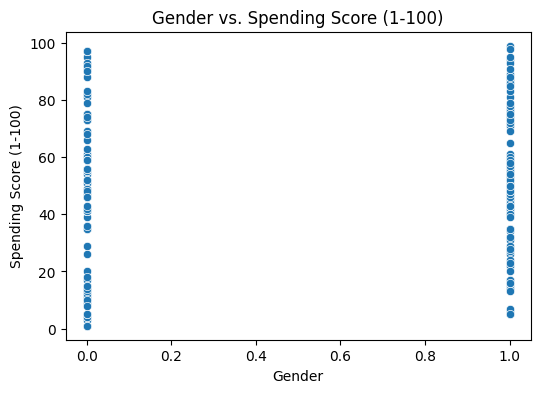

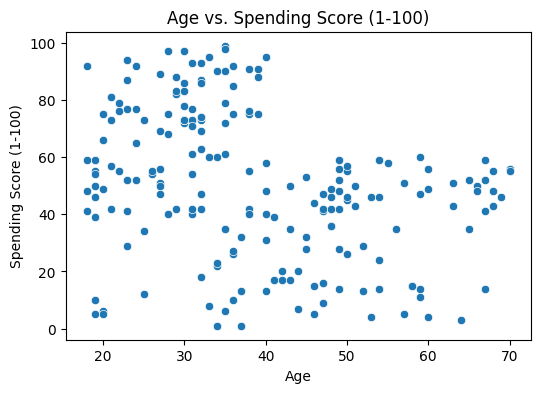

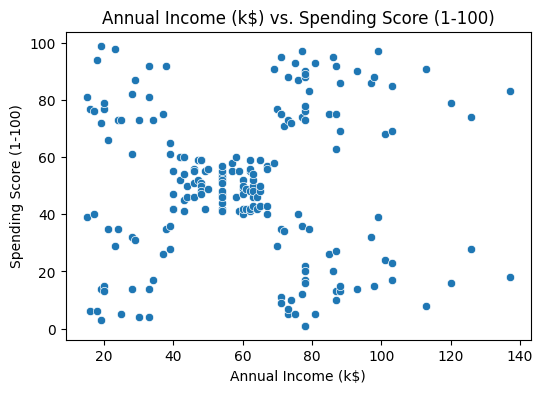

In [8]:
# Veri kümesini görselleştirin
columns = ['Gender', 'Age', 'Annual Income (k$)']
target = 'Spending Score (1-100)'
data = data[columns + [target]]

for column in columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=column, y=target)
    plt.title(f'{column} vs. {target}')
    plt.show()

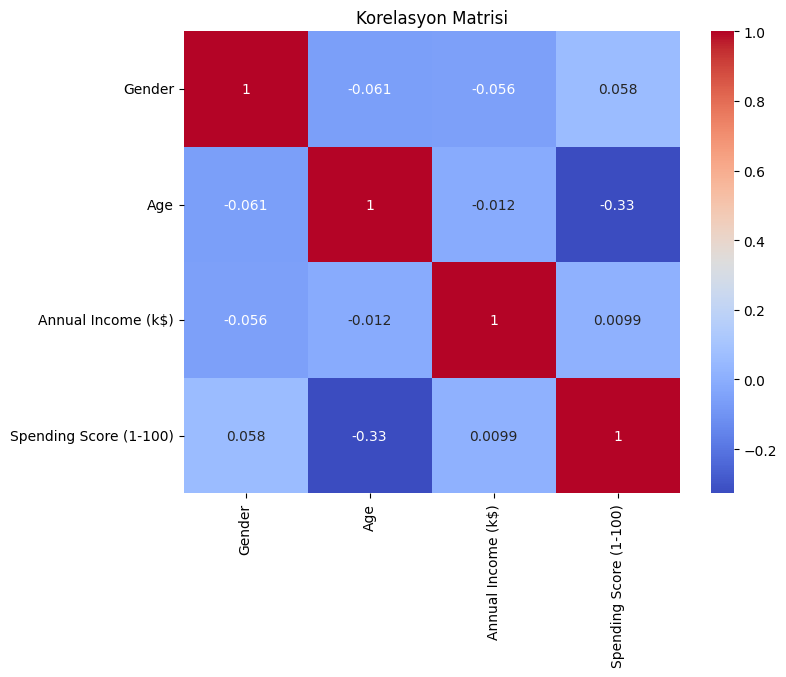

In [9]:
# Veri kümesinde bağımsız değişkenler ile hedef değişken arasındaki korelasyon matrisi.
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirin.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [10]:
# Bağımsız değişkenleri ve hedef değişkeni ayırın
X = data.drop(['Spending Score (1-100)'], axis=1)
y = data['Spending Score (1-100)']

In [11]:
# Bağımsız değişkenler ile hedef değişken arasındaki ilişkiyi değerlendirin.
selector = SelectKBest(f_regression, k=2)
X_new = selector.fit_transform(X, y)

# En iyi özelliklerin indekslerini alın.
feature_indices = selector.get_support(indices=True)

# İlgili özellikleri seçin.
selected_features = X.columns[feature_indices]

# Seçilen özelliklerle yeni bir veri kümesi oluşturun.
X_selected = X[selected_features]

In [12]:
# Veri kümesini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Bir Rastgele Orman regresyon modeli oluşturun
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Modelin eğitim setindeki performansını değerlendirin
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Eğitim Seti Üzerinde Kök Ortalama Kare Hatası (RMSE):", train_rmse)

Eğitim Seti Üzerinde Kök Ortalama Kare Hatası (RMSE): 9.401933480524715


In [15]:
# Modelin test setindeki performansını değerlendirin
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test Seti Üzerinde Kök Ortalama Kare Hatası (RMSE):", test_rmse)

Test Seti Üzerinde Kök Ortalama Kare Hatası (RMSE): 21.432106322673675


In [16]:
# R2 skorunu hesaplayın
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print("R² Sonucu:", train_r2)

R² Result: 0.8725702383049823


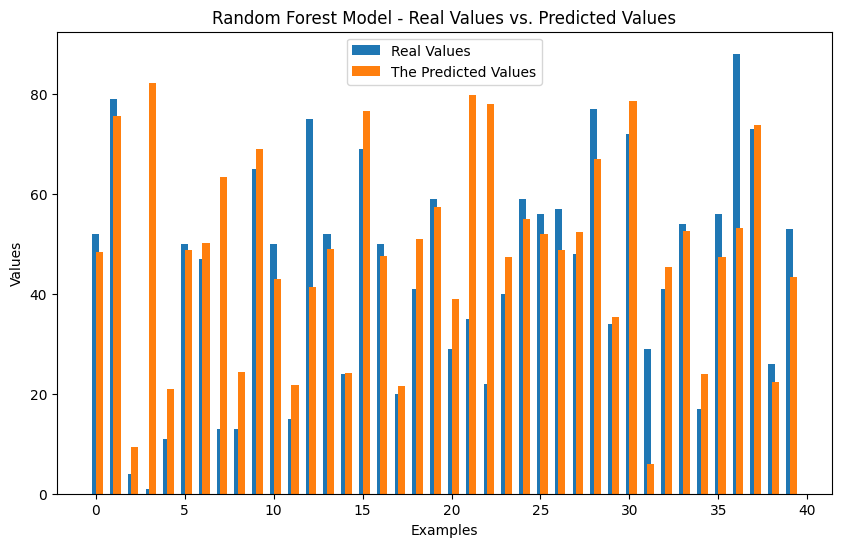

In [17]:
# Gerçek değerleri tahmin edilen değerlerle karşılaştırın.
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(y_test)), y_test, width=0.4, align='center', label='Real Values')
plt.bar(np.arange(len(y_test)), y_test_pred, width=0.4, align='edge', label='The Predicted Values')
plt.xlabel('Examples')
plt.ylabel('Values')
plt.title('Random Forest Model - Real Values vs. Predicted Values')
plt.legend()
plt.show()
